In [42]:
import numpy as np
import timeit
from models import KNN, DecisionTree, preprocessing, RandomForest
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import PlotType, plot, heatmaps, train_test_split, evaluate, evaluate_by_class\
    , grid_search_cv, plot_cluster_by_model
from typing import get_args
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# load data

In [43]:
# Load data
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [44]:
data.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


# Data preprocessing

In [45]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [46]:
X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)

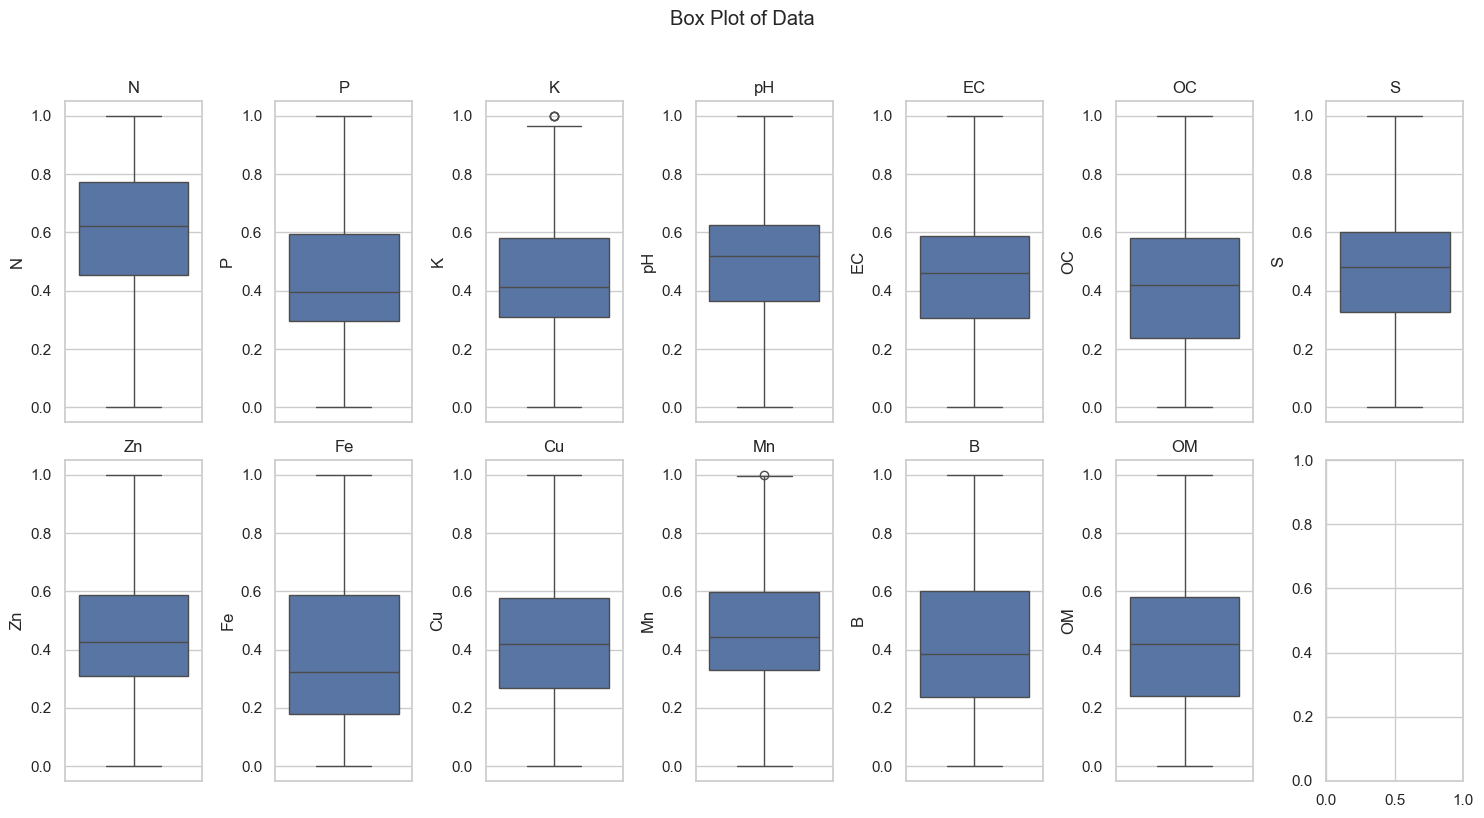

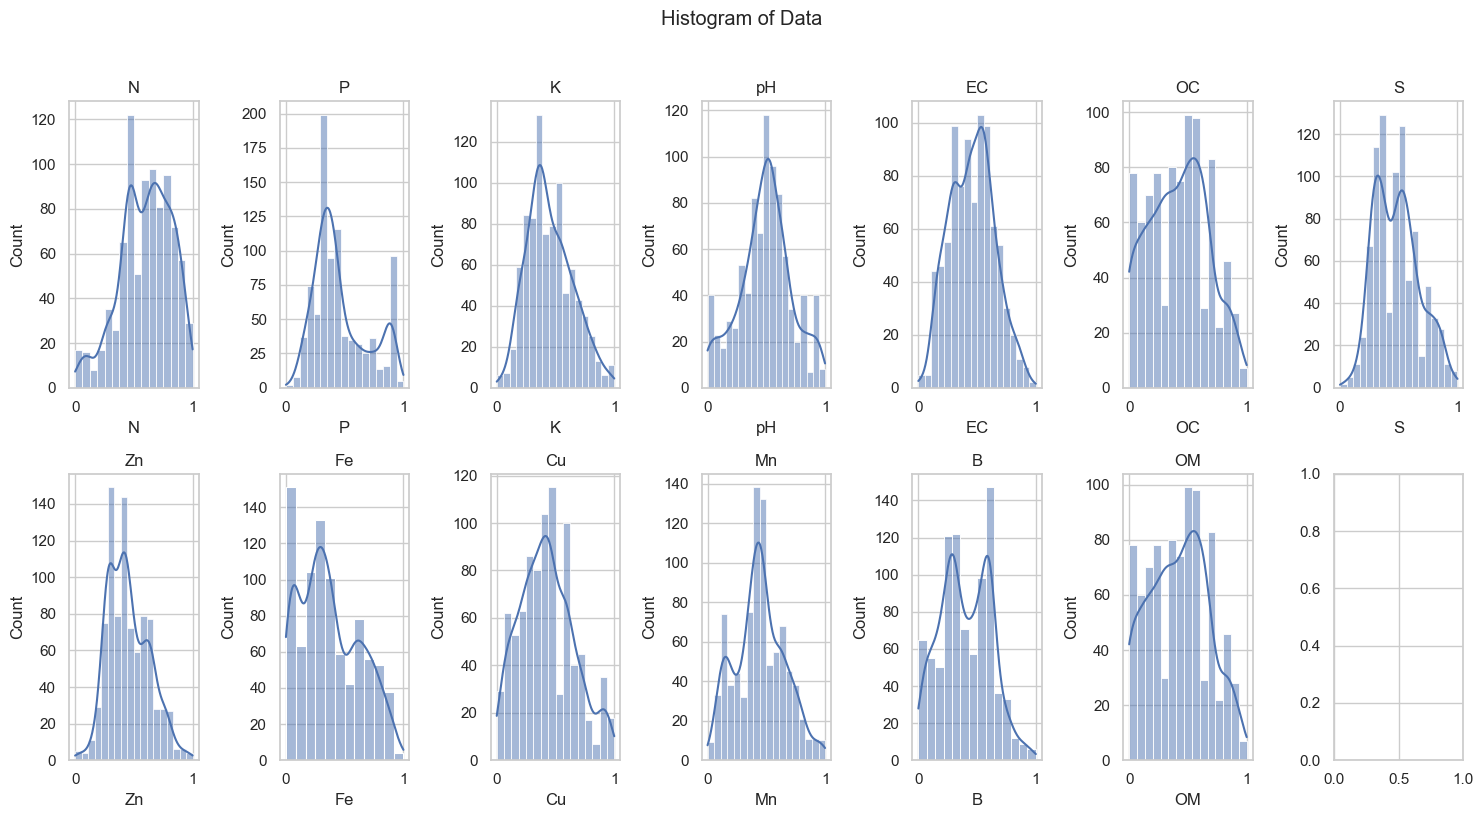

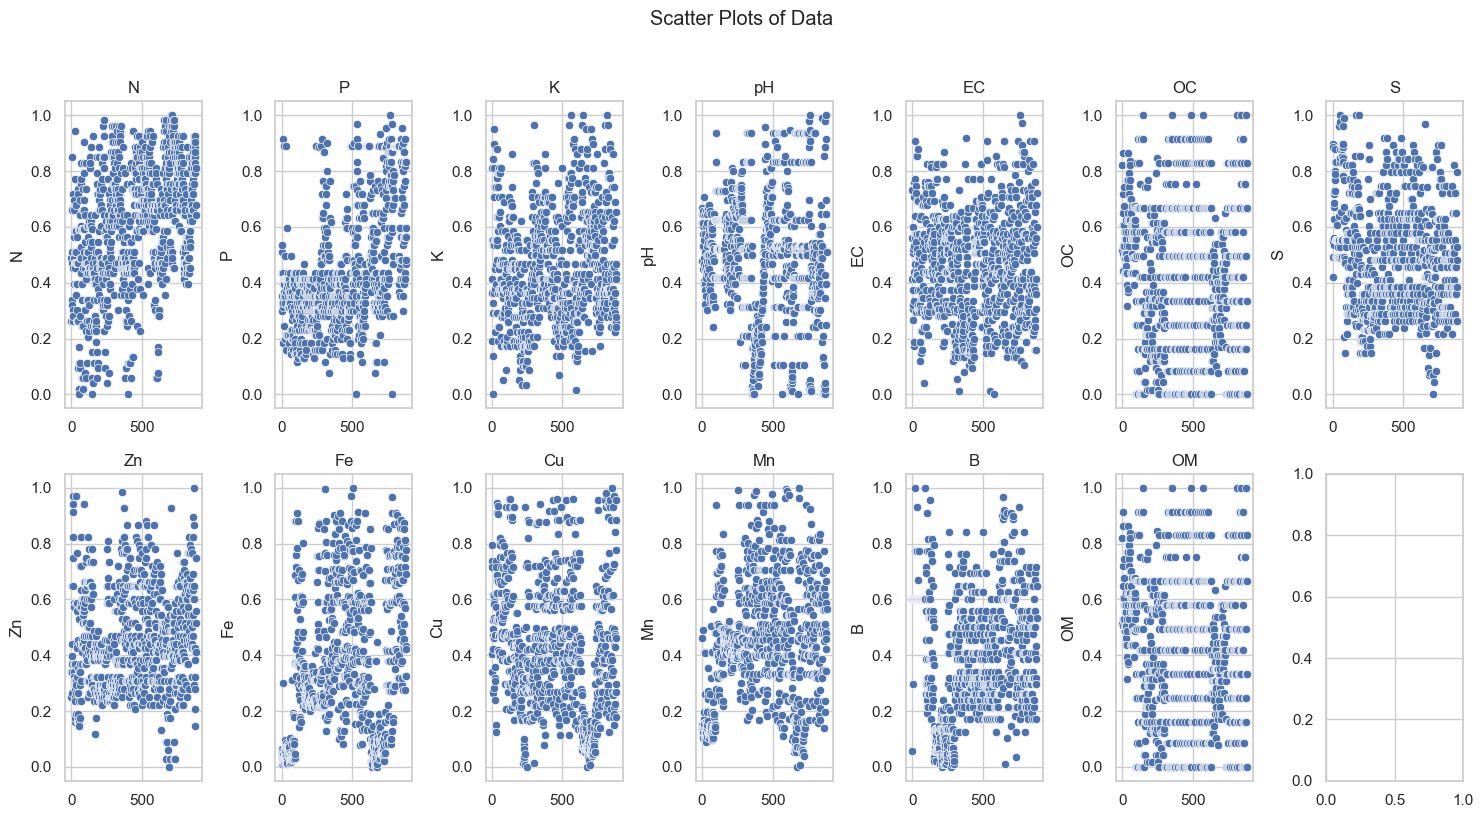

In [47]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [48]:
# save processed data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(706, 13) (176, 13) (706,) (176,)


# KNN

In [51]:
for strategy in strategies:
    knn = KNN(k=3, strategy=strategy)
    knn.fit(X_train, Y_train)
    print(f'Accuracy for {strategy} strategy: {knn.score(X_test, Y_test, metric="accuracy")}')

Accuracy for euclidean strategy: 0.75
Accuracy for manhattan strategy: 0.7102272727272727
Accuracy for minkowski strategy: 0.75
Accuracy for cosine strategy: 0.6931818181818182
Accuracy for hamming strategy: 0.6079545454545454


# Decision tree

In [52]:
tree = DecisionTree()
tree.fit(X_train, Y_train)
print(f'Accuracy for decision tree: {tree.score(X_test, Y_test, metric="accuracy")}')

Accuracy for decision tree: 0.8295454545454546


# Random forest

In [53]:
random_forest = RandomForest(n_trees=10)
random_forest.fit(X, Y)
print(f'Accuracy for random forest: {random_forest.score(X_test, Y_test, metric="accuracy")}')

Accuracy for random forest: 0.9943181818181818


# Search for best parameters using grid search cv

In [54]:
averages = list(get_args(Average))
averages.remove('binary') # out dataset has more than 2 classes, so we can't use binary
averages

['macro', 'micro', 'weighted']

<h4>Knn</h4>

In [55]:
parameters = {'k': [1, 3, 5, 7], 'strategy': strategies.keys()}
results, best_results = grid_search_cv(KNN, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'k': 3, 'strategy': 'manhattan'},
 'best_score': 0.6097221201243977}


,model,accuracy,precision,recall,f1-score,specificity
0,"KNN(strategy=euclidean_distance, k=1)",0.753191,0.615440,0.608217,0.608110,0.850877
1,"KNN(strategy=manhattan_distance, k=1)",0.739007,0.587873,0.566357,0.573854,0.840497
2,"KNN(strategy=minkowski_distance, k=1)",0.741844,0.573237,0.557142,0.560961,0.842894
3,"KNN(strategy=cosine_distance, k=1)",0.686525,0.526222,0.520528,0.520195,0.810496
4,"KNN(strategy=hamming_distance, k=1)",0.558865,0.450084,0.447209,0.443760,0.730394
5,"KNN(strategy=euclidean_distance, k=3)",0.767376,0.530900,0.546496,0.537320,0.854998
6,"KNN(strategy=manhattan_distance, k=3)",0.770213,0.716427,0.593381,0.609722,0.855529
7,"KNN(strategy=minkowski_distance, k=3)",0.777305,0.596542,0.568392,0.570376,0.861448
8,"KNN(strategy=cosine_distance, k=3)",0.726241,0.492360,0.507290,0.499616,0.829813
9,"KNN(strategy=hamming_distance, k=3)",0.575887,0.486414,0.423320,0.427702,0.731604


<h4>Decision tree</h4>

In [56]:
parameters = {'max_depth': [10, 50, 100, 150, 200]}
results, best_results = grid_search_cv(DecisionTree, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 200}, 'best_score': 0.7284834389798731}


,model,accuracy,precision,recall,f1-score,specificity
0,DecisionTree(max_depth=10),0.856738,0.722565,0.713529,0.715416,0.915770
1,DecisionTree(max_depth=50),0.848227,0.705964,0.658444,0.668947,0.910475
2,DecisionTree(max_depth=100),0.868085,0.749991,0.766251,0.725913,0.921954
3,DecisionTree(max_depth=150),0.860993,0.703319,0.722256,0.703769,0.922745
4,DecisionTree(max_depth=200),0.865248,0.750673,0.753456,0.728483,0.923773


<h4>Random forest</h4>

In [57]:
parameters = {'n_trees': [2, 5, 10, 15], 'max_depth': [10, 50, 100, 150, 200]}
results, best_results = grid_search_cv(RandomForest, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 150, 'n_trees': 15},
 'best_score': 0.9160121697773145}


,model,accuracy,precision,recall,f1-score,specificity
0,"RandomForest(n_trees=2, max_depth=10)",0.937589,0.869376,0.823769,0.839739,0.963205
1,"RandomForest(n_trees=2, max_depth=50)",0.934752,0.933640,0.818071,0.847219,0.958925
2,"RandomForest(n_trees=2, max_depth=100)",0.931915,0.856200,0.768070,0.794977,0.956122
3,"RandomForest(n_trees=2, max_depth=150)",0.930496,0.874655,0.813469,0.836222,0.957180
4,"RandomForest(n_trees=2, max_depth=200)",0.950355,0.918592,0.845668,0.873719,0.970223
5,"RandomForest(n_trees=5, max_depth=10)",0.953191,0.952403,0.863106,0.883245,0.970452
6,"RandomForest(n_trees=5, max_depth=50)",0.957447,0.905378,0.864861,0.876625,0.974139
7,"RandomForest(n_trees=5, max_depth=100)",0.943262,0.885890,0.882481,0.877356,0.967891
8,"RandomForest(n_trees=5, max_depth=150)",0.948936,0.927750,0.881875,0.901000,0.968611
9,"RandomForest(n_trees=5, max_depth=200)",0.953191,0.898036,0.896599,0.894482,0.971950


# Evaluate the final models

In [66]:
models = [KNN(k=5, strategy='euclidean'), DecisionTree(max_depth=200), RandomForest(n_trees=15, max_depth=150)]
for model in models:
    model.fit(X_train, Y_train)

models

[KNN(strategy=euclidean_distance, k=5),
 DecisionTree(max_depth=200),
 RandomForest(n_trees=15, max_depth=150)]

In [67]:
results_by_class = evaluate_by_class(X_test, Y_test, models)
pprint(results_by_class)

{'DecisionTree(max_depth=200)': {0.0: {'accuracy': 0.8806818181818182,
                                       'f1-score': 0.8551724137931035,
                                       'precision': 0.8378378378378378,
                                       'recall': 0.8732394366197183,
                                       'specificity': 0.8857142857142857},
                                 1.0: {'accuracy': 0.8352272727272727,
                                       'f1-score': 0.8497409326424871,
                                       'precision': 0.8541666666666666,
                                       'recall': 0.845360824742268,
                                       'specificity': 0.8227848101265823},
                                 2.0: {'accuracy': 0.9431818181818182,
                                       'f1-score': 0.2857142857142857,
                                       'precision': 0.3333333333333333,
                                       'recall': 0.25,
                

In [68]:
results = evaluate(X_test, Y_test, models, averages=averages, metrics=get_args(Metric))
results

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"KNN(strategy=euclidean_distance, k=5)",0.784091,0.521017,0.784091,0.751560,0.55099,0.784091,0.784091,0.534556,0.784091,0.766044,0.861603,0.892045,0.800719
1,DecisionTree(max_depth=200),0.829545,0.675113,0.829545,0.823905,0.65620,0.829545,0.829545,0.663543,0.829545,0.826294,0.894897,0.914773,0.855144
2,"RandomForest(n_trees=15, max_depth=150)",0.875000,0.760000,0.875000,0.870795,0.72318,0.875000,0.875000,0.738530,0.875000,0.872360,0.921192,0.937500,0.888577


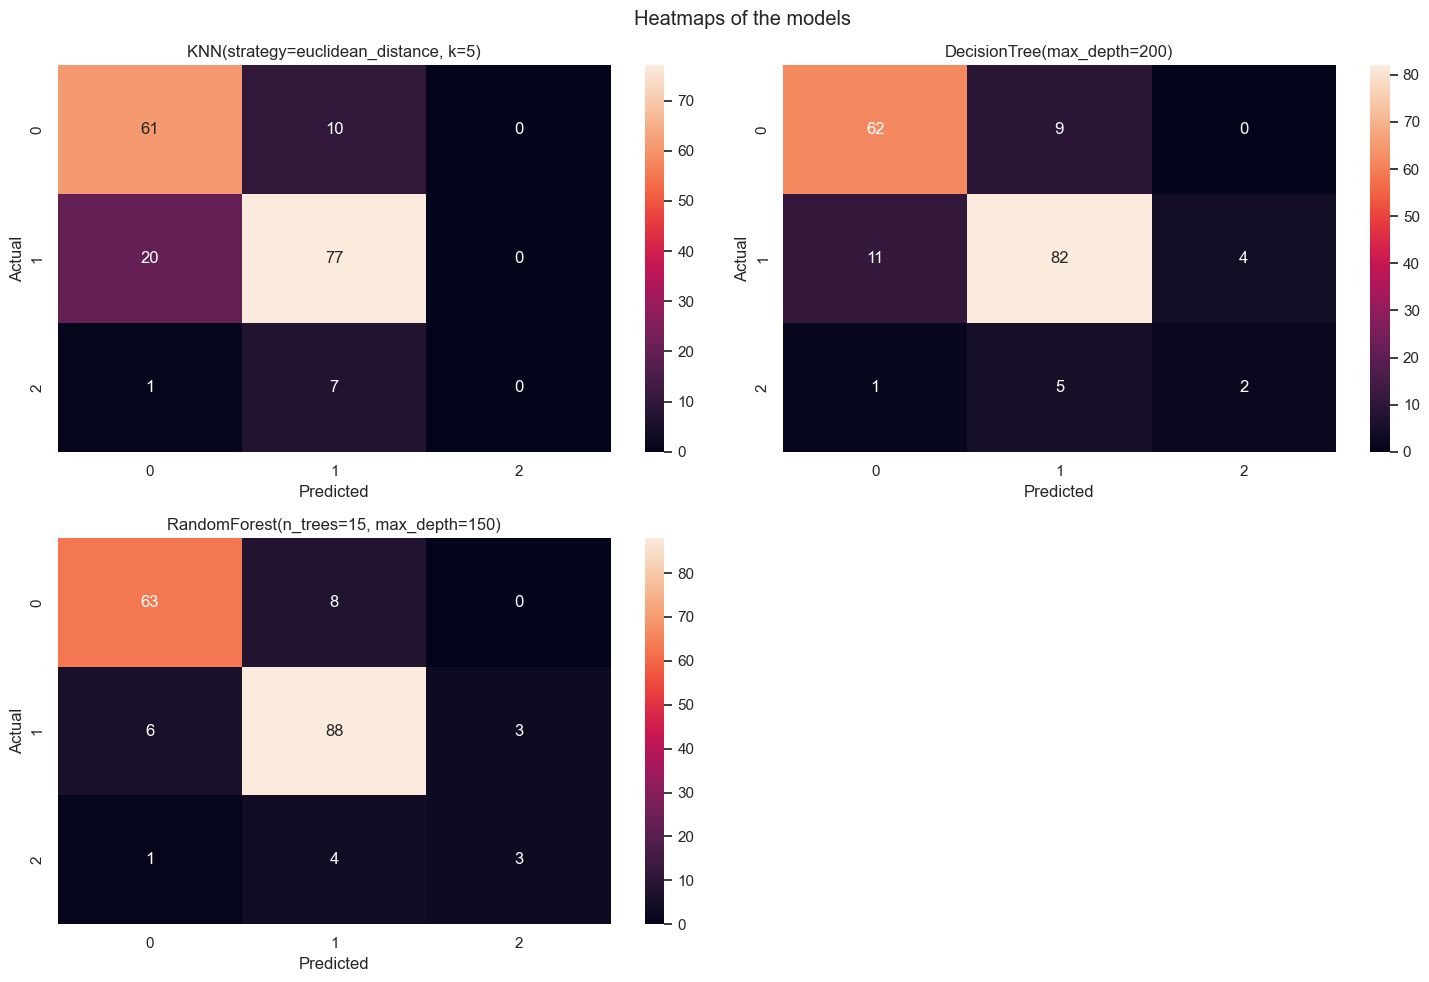

In [69]:
heatmaps(x_test=X_test, y_test=Y_test, models=models)

# execution time

In [70]:
times = []
for model in models:
    execution_time = timeit.timeit(lambda: model.predict(X_test), number=100)
    times.append({'model': str(model), 'time': execution_time})
times = pd.DataFrame(times)

times

,model,time
0,"KNN(strategy=euclidean_distance, k=5)",36.858251
1,DecisionTree(max_depth=200),0.037796
2,"RandomForest(n_trees=15, max_depth=150)",0.542858


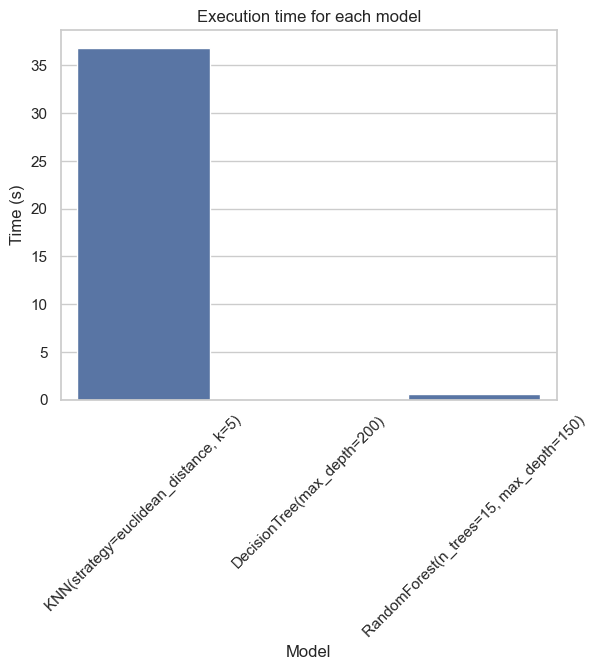

In [71]:
# plot execution time
sns.barplot(x='model', y='time', data=times)

plt.title('Execution time for each model')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.show()

# test with examples

In [64]:
num_examples = 5
for i in range(num_examples):
    # get random example
    random_index = np.random.randint(0, X_test.shape[0])
    x = X_test.iloc[random_index]
    y = Y_test.iloc[random_index]
    print(f'Example {i+1}:')
    print(f'Actual class: {y}')
    for model in models:
        print(f'Prediction for {model.__class__.__name__}: {model.predict_single(x)}')

Example 1:
Actual class: 1.0
Prediction for KNN: 1.0
Prediction for DecisionTree: 1
Prediction for RandomForest: 1
Example 2:
Actual class: 0.0
Prediction for KNN: 0.0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 3:
Actual class: 1.0
Prediction for KNN: 1.0
Prediction for DecisionTree: 1
Prediction for RandomForest: 1
Example 4:
Actual class: 1.0
Prediction for KNN: 1.0
Prediction for DecisionTree: 1
Prediction for RandomForest: 1
Example 5:
Actual class: 0.0
Prediction for KNN: 0.0
Prediction for DecisionTree: 1
Prediction for RandomForest: 0


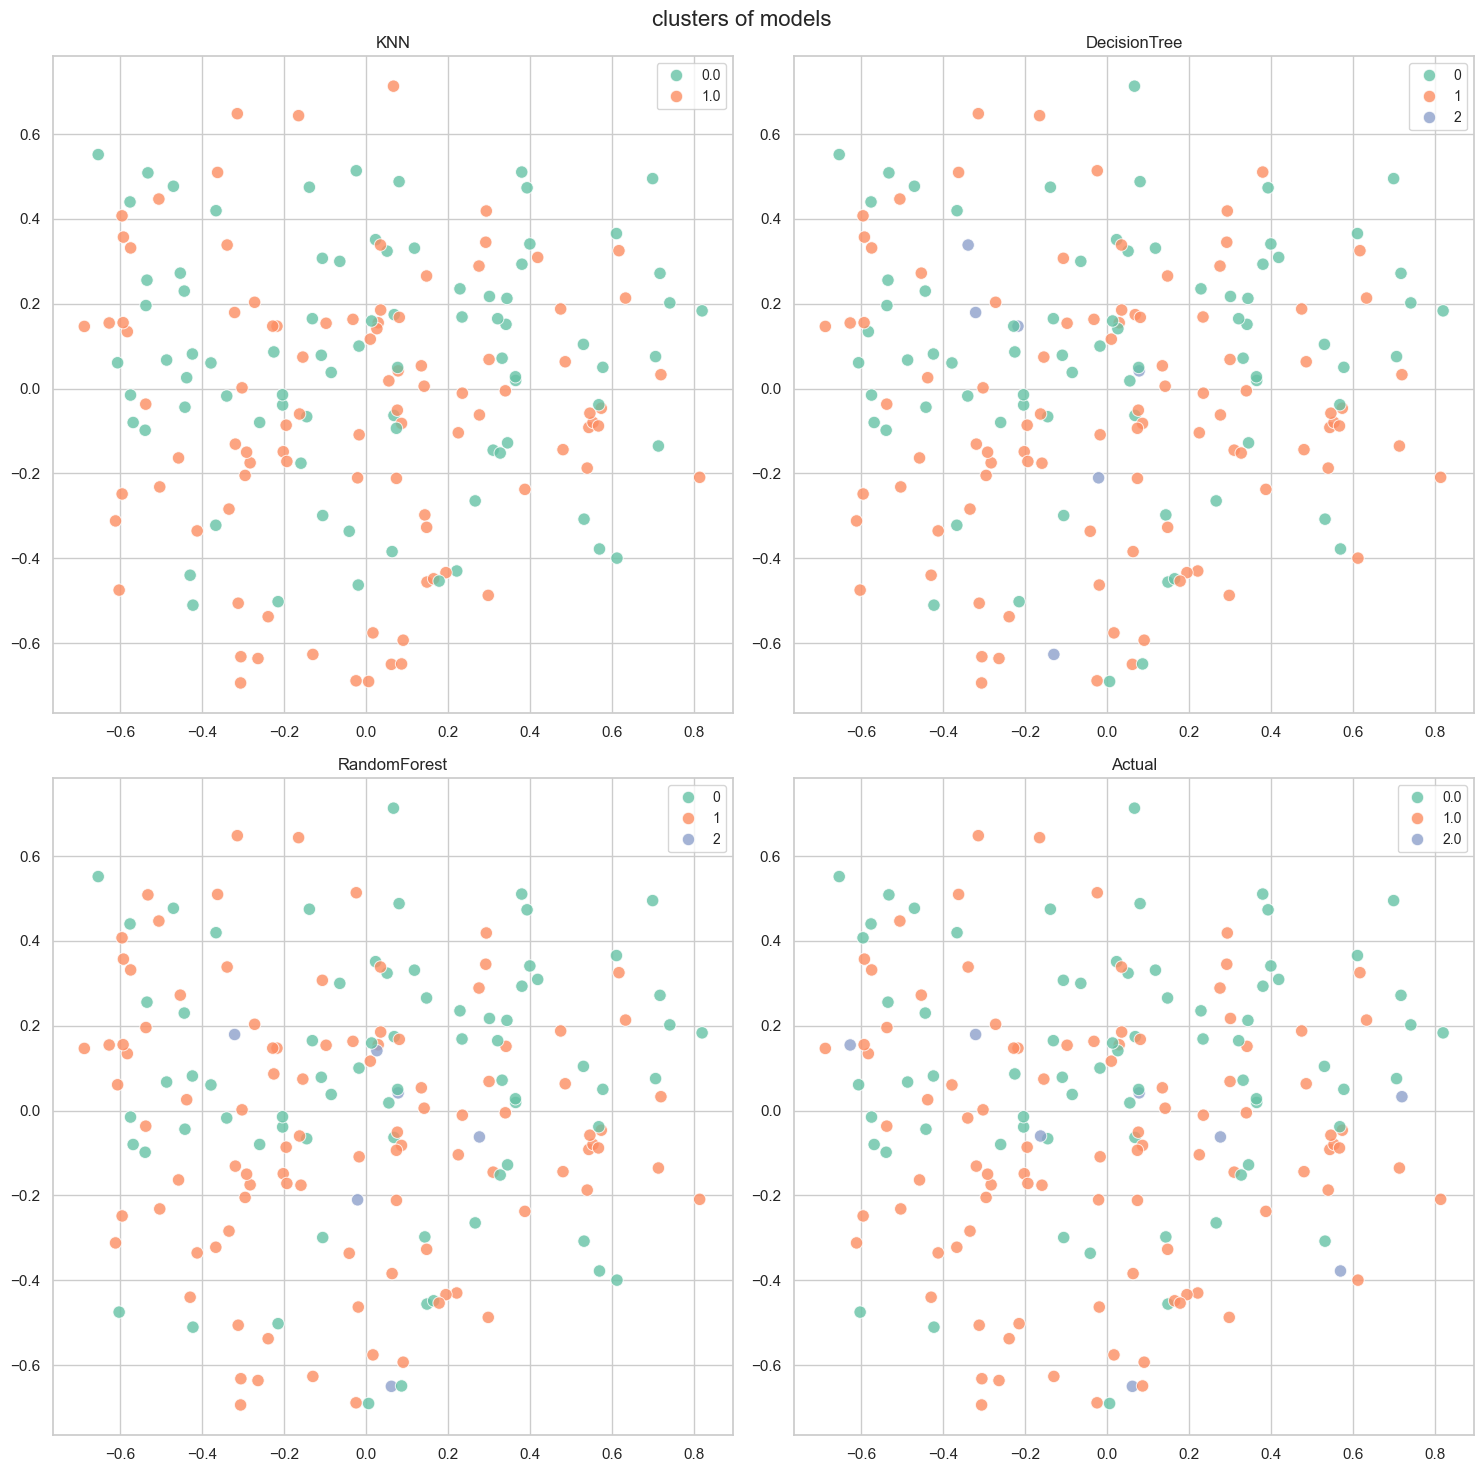

In [65]:
plot_cluster_by_model(X_test, Y_test, "clusters of models", models)